In [448]:
library(igraph)
library(RColorBrewer)

In [449]:
edgelistFile<-"Graph.txt"

In [450]:
g <- read.graph(edgelistFile,directed = FALSE, format=c("ncol"), weights='yes')

In [272]:
is.connected(g)
degreevec<-degree(g)
vcount(g)
ecount(g)

[1] TRUE

[1] 494

[1] 121771

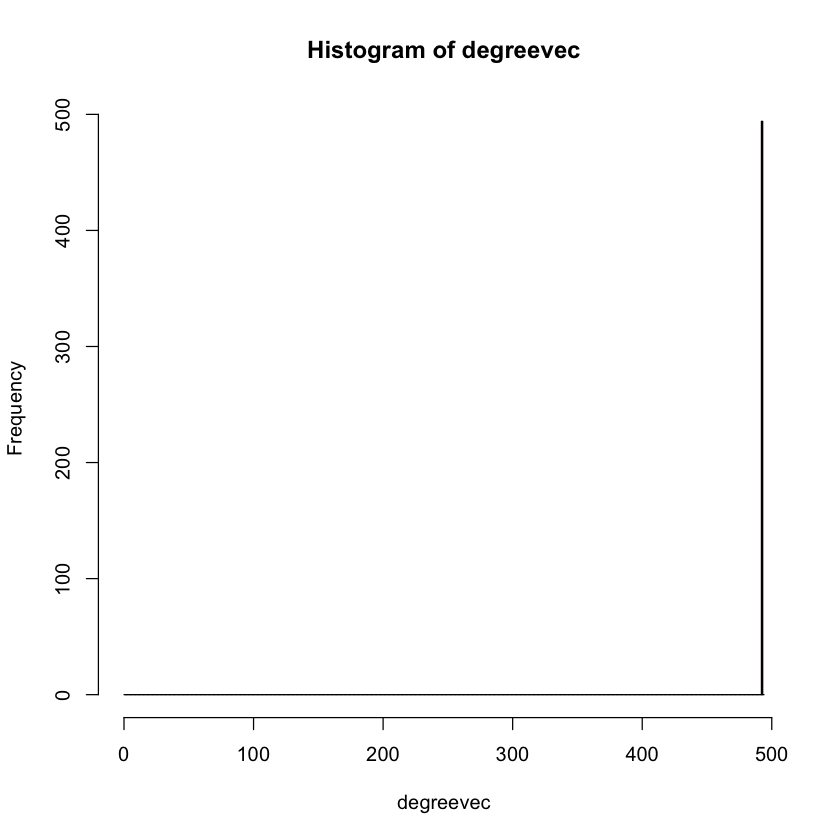

In [273]:
# Q2: Plot the degree distribution of the correlation graph
hist(degreevec, breaks=seq(from=0, to=max(degreevec)+1,by=1),freq=TRUE,col='red')

In [274]:
# Part 1.3
name_sector <- read.csv(file="./finance_data/Name_sector.csv", header=TRUE, sep=",")
unique_name_sector = unique(as.array(name_sector$Sector))
pal <- c(rainbow(n=length(unique_name_sector)))

In [275]:
length(unique_name_sector)

[1] 11

In [276]:
ind = 1
for (val in unique_name_sector){
    print(val)
    map[[val]] <- pal[ind]
    print(map[[val]])
    ind = ind+1
}

[1] "Health Care"
[1] "#FF0000FF"
[1] "Industrials"
[1] "#FF8B00FF"
[1] "Consumer Discretionary"
[1] "#E8FF00FF"
[1] "Information Technology"
[1] "#5DFF00FF"
[1] "Consumer Staples"
[1] "#00FF2EFF"
[1] "Utilities"
[1] "#00FFB9FF"
[1] "Financials"
[1] "#00B9FFFF"
[1] "Real Estate"
[1] "#002EFFFF"
[1] "Materials"
[1] "#5D00FFFF"
[1] "Energy"
[1] "#E800FFFF"
[1] "Telecommunication Services"
[1] "#FF008BFF"


In [277]:
mst_graph = mst(g)
for (vertex in V(mst_graph)$name){
    key = toString(name_sector[name_sector$Symbol==vertex,'Sector'])
    V(mst_graph)[vertex]$color <- map[[key]]
}

In [278]:
vec = character(0)
for (val in strsplit(toString(unique_name_sector),', ')){
     vec = paste(vec, val)
}

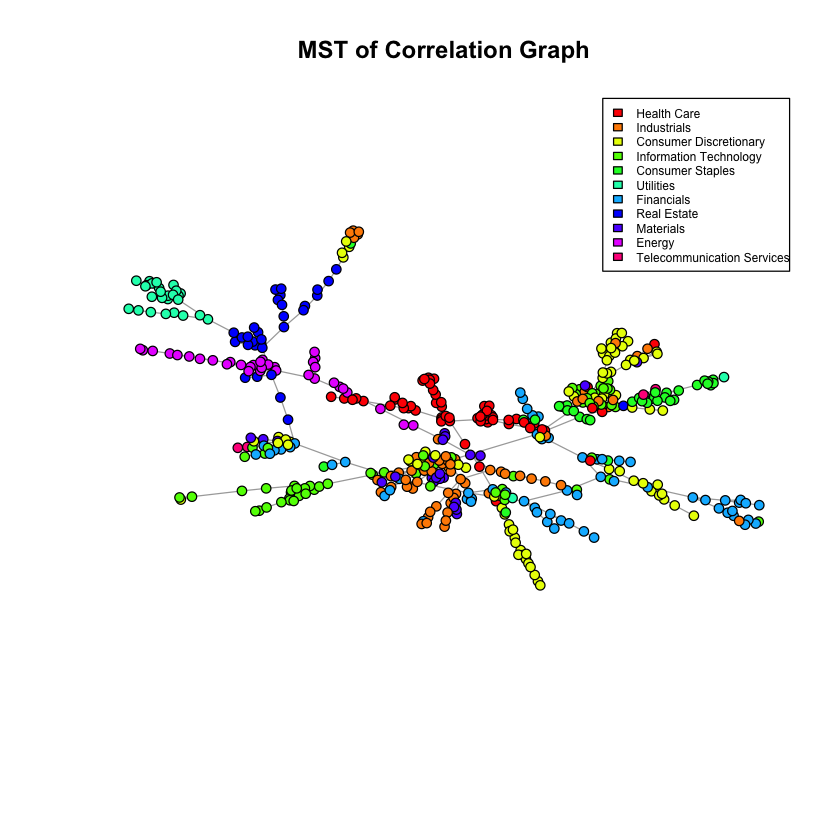

In [298]:
v_vector = rep(3,vcount(mst_graph))
plot(mst_graph, asp=9/16, layout=layout.fruchterman.reingold, vertex.size=v_vector,vertex.label=NA, main="MST of Correlation Graph")
legend("topright", cex=0.6, c(vec), fill=c(pal))

In [441]:
prob_v_1<-function(graph, vertex){
    cnt = 0
    neighbor_list = neighbors(graph, vertex)
    key = toString(name_sector[name_sector$Symbol==vertex,'Sector'])
    for (index in seq(1, length(neighbor_list), by=1)){
        neighbor = neighbor_list[[index]]
        if (toString(name_sector[name_sector$Symbol==neighbor$name,'Sector'])==key){
            cnt = cnt+1
        }
    }
#     print(cnt)
#     print(length(neighbor_list))
    return (cnt/length(neighbor_list))
}

In [442]:
prob_v_2<-function(graph, vertex){
    cnt = 0
    key = toString(name_sector[name_sector$Symbol==vertex,'Sector'])
    for (v in name_sector[name_sector$Sector==key,'Symbol']){
        cnt = cnt+1
    }
    return (cnt/length(V(graph)))
}

In [443]:
# Part 1.4 Case 1
vertex_count = length(V(mst_graph))
sum = 0
for(vertex in V(mst_graph)$name){
    sum = sum + prob_v_1(mst_graph, vertex)
}
alpha = sum/vertex_count
print(alpha)

[1] 0.8289301


In [444]:
# Part 1.4 Case 2
vertex_count = length(V(mst_graph))
sum = 0
for(vertex in V(mst_graph)$name){
    sum = sum + prob_v_2(mst_graph, vertex)
}
alpha = sum/vertex_count
print(alpha)

[1] 0.1168967


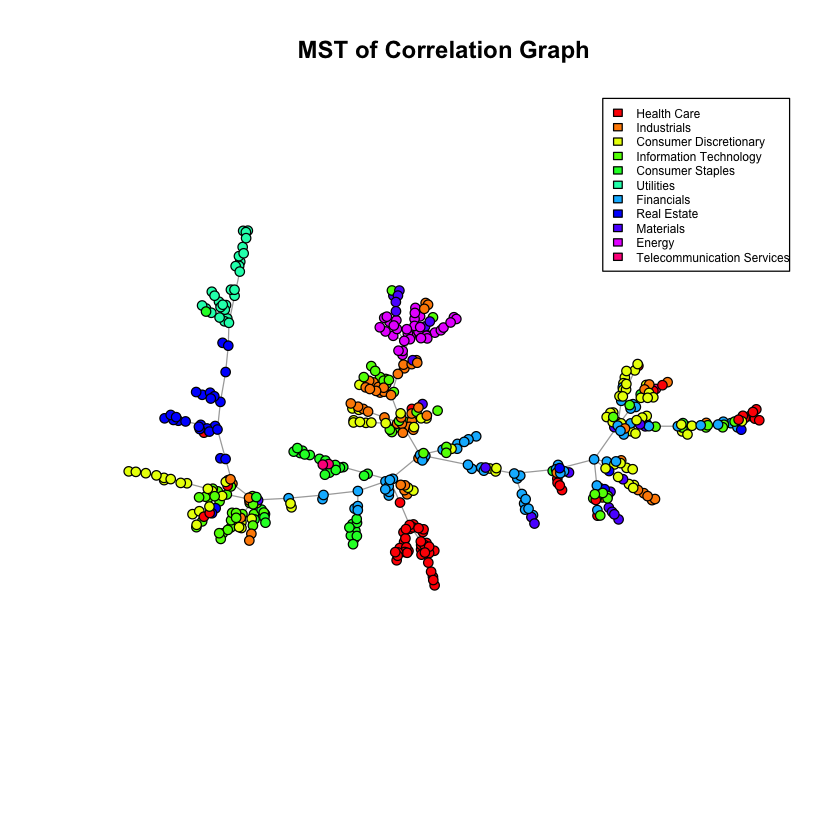

In [452]:
# Part 1.5
edgelistFile<-"Graph_2.txt"
g <- read.graph(edgelistFile,directed = FALSE, format=c("ncol"), weights='yes')
name_sector <- read.csv(file="./finance_data/Name_sector.csv", header=TRUE, sep=",")
unique_name_sector = unique(as.array(name_sector$Sector))
pal <- c(rainbow(n=length(unique_name_sector)))
ind = 1
for (val in unique_name_sector){
    map[[val]] <- pal[ind]
    ind = ind+1
}
mst_graph_2 = mst(g)
for (vertex in V(mst_graph_2)$name){
    key = toString(name_sector[name_sector$Symbol==vertex,'Sector'])
    V(mst_graph_2)[vertex]$color <- map[[key]]
}
vec = character(0)
for (val in strsplit(toString(unique_name_sector),', ')){
     vec = paste(vec, val)
}
v_vector = rep(3,vcount(mst_graph_2))
plot(mst_graph_2, asp=9/16, layout=layout.fruchterman.reingold, vertex.size=v_vector,vertex.label=NA, main="MST of Correlation Graph")
legend("topright", cex=0.6, c(vec), fill=c(pal))

In [455]:
# Part 1.4 Case 1
vertex_count = length(V(mst_graph_2))
sum = 0
for(vertex in V(mst_graph_2)$name){
    sum = sum + prob_v_1(mst_graph_2, vertex)
}
alpha = sum/vertex_count
print(alpha)

[1] 0.7195069


In [456]:
# Part 1.4 Case 2
vertex_count = length(V(mst_graph_2))
sum = 0
for(vertex in V(mst_graph_2)$name){
    sum = sum + prob_v_2(mst_graph_2, vertex)
}
alpha = sum/vertex_count
print(alpha)

[1] 0.1168967
